In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx
import random
import os
import imageio
from collections import Counter

In [2]:
def plague_model(z, t = np.linspace(0, 10, 1000), b = 3, beta = 3, k = 3):
    """
    Helper function for calculating the solution of a Plague model system of ODEs
    
    Key arguments:
    z -- Initial conditions of S and I -- list of 2 elements (floats)
    t -- timeline of the solution -- list of time points (floats)
    b, beta, k -- parameters of the equation - floats
    
    Function returns the list of formulas needed for further calculations
    """
    S = z[0]
    I = z[1]
    dSdt = b*S - beta*I*S
    dIdt = beta*I*S - k*I
    dzdt = [dSdt,dIdt]
    return dzdt

In [3]:
def phase_plane_plot(model, range_x = (-1,1), range_y = None,
                     num_grid_points = 50, show = False):
    '''
    Simple implementation of the phase plane plot in matplotlib.
    
    Key arguments:
    model -- function that takes numpy.array as input with two elements representing two state variables
    range_x -- tuple, range of x axis
    range_y -- tuple range of y axis; if None, the same range as range_x
    num_grid_points -- number of samples on grid - int
    show -- if True it shows matplotlib plot - bool
        
    '''
    if range_y is None:
        range_y = range_x
    x_ = np.linspace(range_x[0], range_x[1], num_grid_points)                                                             
    y_ = np.linspace(range_y[0], range_y[1], num_grid_points)                                                             

    grid = np.meshgrid(x_, y_)

    dfmat = np.zeros((num_grid_points, num_grid_points, 2))
    for nx in range(num_grid_points):
        for ny in range(num_grid_points):
            df = model([grid[0][nx,ny], grid[1][nx,ny]])
            dfmat[nx, ny, 0] = df[0]
            dfmat[nx, ny, 1] = df[1]


    plt.quiver(grid[0], grid[1], dfmat[:, :, 0], dfmat[:, :, 1])
    if show:
        plt.show()

In [4]:
def create_gif(path, Graph):
    """
    Function creates gif of a random walk of an agent. 
    
    path -- path to a directory with photos that contribute to the creation of the gif (str)
    """
    images = []
    dirs = os.listdir(path)
    new_images = sorted(dirs, key = len)
    for file in new_images:
        if file.endswith(".png"):
                images.append(imageio.imread(file))
    kargs = { 'duration': 1 }
    imageio.mimsave("C:\\Users\\user\\Desktop\\Applied mathematics\\Semestr 1\\Diffusion processes\\List 5\\"+Graph+".gif", images,**kargs)

In [9]:
def Plague_model_solution(z0, phase_plane = True, b = 3, beta = 3, k = 3):
    """
    Function solves the plague model system of equations with the given initial conditions and parameters
    and optionally draws a phase lane
    Key arguments:
    z0 -- Initial conditions of S and I - list of 2 elements (floats)
    phase_plane -- bool - if set to True, it creates a phase plane of the solution 
    b, beta, k -- factors of the equation - floats
    
    """
    n = 1000
    t = np.linspace(0, 10, n)
    S = np.empty_like(t)
    I = np.empty_like(t)
    S[0] = z0[0]
    I[0] = z0[1]
    for i in range(1,n):
        tspan = [t[i-1],t[i]]
        z = odeint(plague_model, z0, tspan, args = (b, beta, k,))
        S[i] = z[1][0]
        I[i] = z[1][1]
        z0 = z[1]
    plt.plot(t, S, 'b-', label = 'I(t)')
    plt.plot(t, I, 'r-', label = 'S(t)')
    plt.ylabel('values')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.title("Numerical solution")
    plt.show()
    if phase_plane == True:
        fig = plt.figure()
        fig.set_size_inches(8,8)
        ics = np.arange(1, 3.0, 0.2)
        for r in ics:
            Z0 = [1, r]
            Z = odeint(plague_model, Z0, t, args = (b, beta, k,))
            plt.plot(Z[:,0], Z[:,1], "-")
        plt.xlabel("S(t)")
        plt.ylabel("I(t)")
        plt.title("Phase portrait")
        phase_plane_plot(plague_model, range_x = (0, 3), show = True)
        

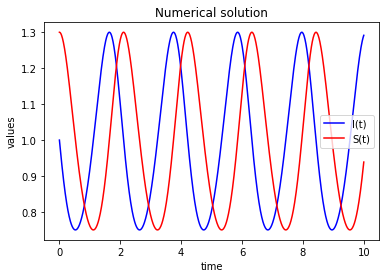

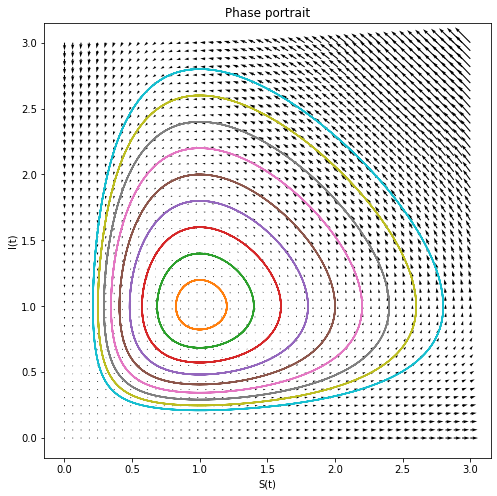

In [10]:
Plague_model_solution([1, 1.3])

In [63]:
def SIR_model(z, t, beta, r):
    """
    Helper function for calculating the solution of a SIR model system of ODEs
    
    Key arguments:
    z -- Initial conditions of S and I -- list of 2 elements (floats)
    t -- timeline of the solution -- list of time points (floats)
    beta, r -- parameters of the equation - floats
    
    Function returns the list of formulas needed for further calculations
    """
    S = z[0]
    I = z[1]
    R = z[2]
    dSdt = -beta*I*S
    dIdt = beta*I*S - r*I
    dRdt = r*I
    dzdt = [dSdt, dIdt, dRdt]
    return dzdt

In [65]:
def SIR_model_solution(z0, N, beta, r):
    """
    Function solves the SIR model system of equations with the given initial conditions and parameters
    and draws a graph of the solutions, function also indicates if there was an epidemic based on the value of its parameters
    
    Key arguments:
    z0 -- Initial conditions of S and I - list of 2 elements (floats) 
    r, beta, N -- parameters of the equation - floats
    
    """
    R_0 = N*beta/r
    n = 1000
    t = np.linspace(0, 50, n)
    S = np.empty_like(t)
    I = np.empty_like(t)
    R = np.empty_like(t)
    S[0] = z0[0]
    I[0] = z0[1]
    R[0] = z0[2]
    for i in range(1,n):
        tspan = [t[i-1],t[i]]
        z = odeint(SIR_model, z0, tspan, args = (beta, r,))
        S[i] = z[1][0]
        I[i] = z[1][1]
        R[i] = z[1][2]
        z0 = z[1]
    plt.plot(t, S, 'b-', label = 'S(t)')
    plt.plot(t, I, 'r-', label = 'I(t)')
    plt.plot(t, R, 'g-', label = 'R(t)')
    plt.ylabel('values')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.title("Numerical solution")
    plt.show()
    if R_0>1:
        print("There was an epidemic!")
    else:    
        print("There was no epidemic!")

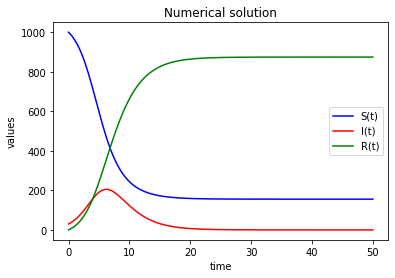

There was an epidemic!


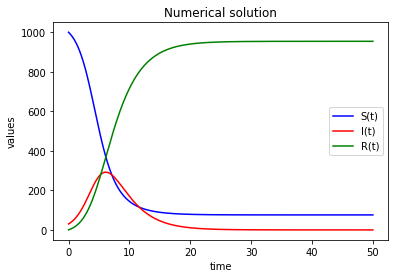

There was an epidemic!


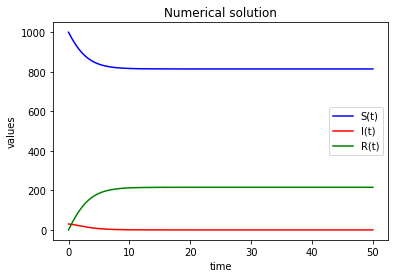

There was no epidemic!


In [66]:
SIR_model_solution([1000, 30, 0], 1000, 0.001, 0.47)
SIR_model_solution([1000, 30, 0], 1000, 0.001, 0.37)
SIR_model_solution([1000, 30, 0], 1000, 0.002, 2.1)

In [127]:
def SIR_model_reduced(z, beta, r, t = np.linspace(0, 50, 1000)):
    """
    Helper function for calculating the solution of a reduced SIR model system of ODEs
    
    Key arguments:
    z -- Initial conditions of S and I -- list of 2 elements (floats)
    t -- timeline of the solution -- list of time points (floats)
    beta, r -- parameters of the equation - floats
    
    Function returns the list of formulas needed for further calculations
    """
    
    S = z[0]
    I = z[1]
    dSdt = -beta*I*S
    dIdt = beta*I*S - r*I
    dzdt = [dSdt, dIdt]
    return dzdt

In [128]:
def SIR_model_reduced_solution(S0, beta, I_min, I_max, r):
    """
    Function draws a phase plane of the solutions of the reduced SIR model
    
    Key arguments:
    I0, S0 -- initial conditions - floats
    r_min, r_max, beta -- parameters of the equation - floats
    
    """
    n = 1000
    t = np.linspace(0, 50, n)
    fig = plt.figure()
    fig.set_size_inches(8,8)
    ics = np.arange(I_min, I_max, 50)
    for i in ics:
        Z0 = [S0, i]
        Z = odeint(SIR_model_reduced, Z0, t, args = (beta, r,))
        plt.plot(Z[:,0], Z[:,1], "-")
    plt.xlabel("S(t)")
    plt.ylabel("I(t)")
    plt.title("Phase portrait")
    phase_plane_plot(plague_model, range_x = (0, S0), range_y = (0, S0) , show = True)

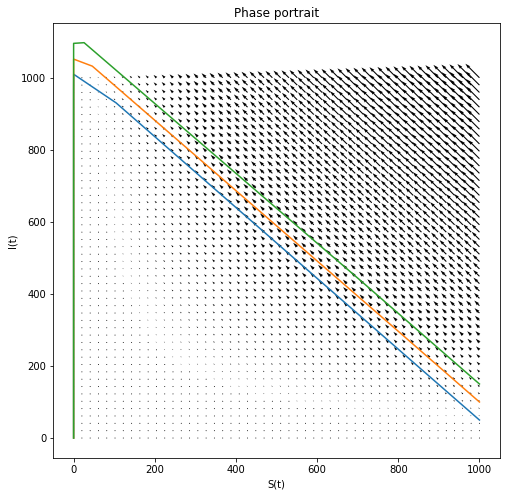

In [134]:
SIR_model_reduced_solution(1000, 0.5, 50, 200, 17)

In [81]:
def SIR_model_infections(z0, N, beta, r):
    """
    Function checks how many objects were infected till the end of the pandemic (i.e when the value of I doesnt exceed 10^-3)
    
    Key arguments:
    z0 -- Initial conditions of S and I - list of 2 elements (floats) 
    r, beta, N -- parameters of the equation - floats
    
    Function returns number of the objects infected
    """
    R_0 = N*beta/r
    n = 1000
    t = np.linspace(0, 50, n)
    S = np.empty_like(t)
    I = np.empty_like(t)
    R = np.empty_like(t)
    S[0] = z0[0]
    I[0] = z0[1]
    R[0] = z0[2]
    for i in range(1,n):
        tspan = [t[i-1],t[i]]
        z = odeint(SIR_model, z0, tspan, args = (beta, r,))
        S[i] = z[1][0]
        I[i] = z[1][1]
        R[i] = z[1][2]
        z0 = z[1]
        if i> 300 and I[i] <10**(-3):
            return R[i]
            break

In [100]:
print(SIR_model_infections([1000, 10, 0],1000, 0.005, 6)) #R0 = 1000*0.005/6 = 0.83 
print(SIR_model_infections([1000, 10, 0],1000, 0.04, 20)) #R0 = 1000*0.04/20 = 5

54.012382489917705
991.0140488840889


In [101]:
N = 1
vector_R0 = []
vector_total_infected = []
betas = [x/100 for x in range(1, 301, 10)]
rs = [y for y in range(1, 301, 10)]
for beta in betas:
    for r in rs:
        R0 = N*beta/r
        result = SIR_model_infections([N, 0.03, 0], N, beta, r)
        if R0 not in vector_R0 and beta != r and result is not None:
            vector_R0.append(R0)
            vector_total_infected.append(result)
R0_vals = dict(zip(vector_R0, vector_total_infected))

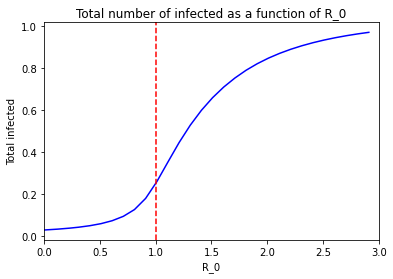

In [102]:
sorted_R0_vals = dict(sorted(R0_vals.items()))
R_0 = list({key: sorted_R0_vals[key] for key in sorted_R0_vals.keys()})
total_infected = list(sorted_R0_vals.values())
plt.plot(R_0,total_infected, 'b-')
plt.axvline(x = 1, color = 'red', linestyle = '--')
plt.xlim([0,3])
plt.xlabel("R_0")
plt.ylabel("Total infected")
plt.title("Total number of infected as a function of R_0")
plt.show()

In [104]:
def SIR_model_on_a_network(p, G = nx.fast_gnp_random_graph(1000, 0.02), N = 10):
    """
    Function simulates the spreading of the infection on a given network, function creates photos of every step
    of the infection, which are then used to create gif.
    
    Key arguments:
    p -- probability of contagion between the adjacent infected and susceptible node - int
    G -- graph object or a string indicating that it's a lattice - nx object or string "lattice"
    N -- optional size of the lattice
    """
    if G == "lattice":
        G = nx.grid_2d_graph(N,N)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * N + j) for i, j in G.nodes() )
        start = (random.randint(0, N-1),random.randint(0, N-1))
    else:
        start = random.randint(0, len(G.nodes()))
        pos = nx.spring_layout(G)
        labels = {i : i for i in range(0, len(G.nodes()))} 
    all_nodes = G.nodes()
    infected_nodes = [start]
    recovered_nodes = []
    susceptible_nodes = list(set(all_nodes) - set(infected_nodes))
    nx.draw_networkx_edges(G, pos)       
    nx.draw_networkx_nodes(G, pos, nodelist = susceptible_nodes, node_color = 'b')
    nx.draw_networkx_nodes(G, pos, nodelist = infected_nodes, node_color = 'r')
    nx.draw_networkx_nodes(G, pos, nodelist = recovered_nodes, node_color = 'g')
    nx.draw_networkx_labels(G, pos, labels, font_size = 14)
    plt.savefig("Graph" + str(0) + ".png", dpi = 300)
    counter = 0
    list_counter = []
    fraction_of_p = []
    while len(infected_nodes) > 0:
        fraction_of_p.append(len(infected_nodes)/len(G.nodes()))
        contaged_at_timestep = []
        recovered_at_timestep = []
        for infected in infected_nodes:
            neighbours = list(G.neighbors(infected))
            susceptible_neighbours=[]
            for neighbour in neighbours:
                if neighbour in susceptible_nodes:
                    susceptible_neighbours.append(neighbour)
            for i in susceptible_neighbours:
                rand = random.random()
                if rand < p:
                    contaged_at_timestep.append(i)
                    susceptible_nodes.remove(i)
            recovered_nodes.append(infected)
            recovered_at_timestep.append(infected)
        for z in contaged_at_timestep:
            infected_nodes.append(z)
        for s in recovered_at_timestep:
            infected_nodes.remove(s)
        nx.draw_networkx_nodes(G, pos, nodelist = susceptible_nodes, node_color = 'b')
        nx.draw_networkx_nodes(G, pos, nodelist = infected_nodes, node_color = 'r')
        nx.draw_networkx_nodes(G, pos, nodelist = recovered_nodes, node_color = 'g')
        nx.draw_networkx_edges(G, pos) 
        counter+=1
        plt.savefig("Graph" + str(counter) + ".png", dpi = 300) 
        
        list_counter.append(counter)    
    plt.figure(figsize=(20,20)) 
    plt.show()

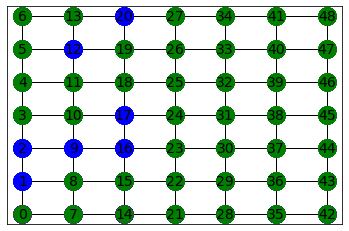

<Figure size 1440x1440 with 0 Axes>

In [105]:
#G = nx.fast_gnp_random_graph(30, 0.2)
#G = nx.barabasi_albert_graph(30, 3)
#G = nx.watts_strogatz_graph(30, k = 4, p = 0.5)
SIR_model_on_a_network(0.55, "lattice", 7)
#SIR_model_on_a_network(0.45, G)

In [48]:
create_gif("C:\\Users\\user\\Desktop\\Applied mathematics\\Semestr 1\\Diffusion processes\\List 5", "2D_Lattice_graph")

In [106]:
def SIR_model_on_a_network_infected(p, start, G = nx.fast_gnp_random_graph(1000, 0.007), N = 10):
    """
    Function simulates the spreading of the infection on a given network
    
    Key arguments:
    p -- probability of contagion between the adjacent infected and susceptible node - float
    start -- the first infected node
    G -- graph object or a string indicating that it's a lattice - nx object or string "lattice"
    N -- optional size of the lattice - int
    
    Function returns:
    1) dictionary where the keys are the next timesteps of infection and values are the fraction of infected nodes of
        the whole network at each timestep
    2) Fraction of the whole network that was infected after the end of the spreading
    3) Time to clear the infection in a given network
    4) Time needed to reach the biggest number of infected objects during the pandemic
    """
    if G == "lattice":
        G = nx.grid_2d_graph(N,N)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
    all_nodes = G.nodes()
    infected_nodes = [start]
    recovered_nodes = []
    susceptible_nodes = list(set(all_nodes) - set(infected_nodes))
    counter = 0
    list_counter = []
    fraction_of_p = []
    
    while len(infected_nodes) > 0:
        fraction_of_p.append(len(infected_nodes)/len(G.nodes()))
        contaged_at_timestep = []
        recovered_at_timestep = []
        for infected in infected_nodes:
            neighbours = list(G.neighbors(infected))
            susceptible_neighbours=[]
            for neighbour in neighbours:
                if neighbour in susceptible_nodes:
                    susceptible_neighbours.append(neighbour)
            for i in susceptible_neighbours:
                rand = random.random()
                if rand < p:
                    contaged_at_timestep.append(i)
                    susceptible_nodes.remove(i)
            recovered_nodes.append(infected)
            recovered_at_timestep.append(infected)
        for z in contaged_at_timestep:
            infected_nodes.append(z)
        for s in recovered_at_timestep:
            infected_nodes.remove(s)
        counter+=1
        list_counter.append(counter)
    fraction_of_network_infected = round(len(recovered_nodes)/len(all_nodes),3)
    time_to_clear_infection = counter+1
    time_to_largest_infected_nodes = fraction_of_p.index(max(fraction_of_p))+1
    return dict(zip(list_counter, fraction_of_p)), fraction_of_network_infected, time_to_clear_infection, time_to_largest_infected_nodes

In [107]:
def SIR_model_statistics(list_of_p, G = nx.fast_gnp_random_graph(100, 0.1),starting_node = 1, N = 10):
    """
    Function uses the Monte Carlo method to simulate multiple times the spreading of the infection on a given network. 
    For each value of the p from list_of_p, simulates the SIR model 100 times and saves the results
    
    Key arguments:
    list_of_p -- list of probabilities of contagion between the adjacent infected and susceptible node - list of floats
    G -- graph object or a string indicating that it's a lattice - nx object or string "lattice"
    starting_node -- the first infected node - int or tuple in case of the lattice
    N -- optional size of the lattice
    
    Function returns:
    1) List of Average fractions of the infected nodes of the whole network at each timestep
    2) List of subsequent timesteps of infection 
    3) List of average fractions of the whole network that was infected after the end of the spreading
    4) List of average time to clear the infection in a given network
    5) List of average time needed to reach the biggest number of infected objects during the pandemic
    """
    fractions = []
    timestep = []
    fractions_of_network_infected = []
    times_to_clear_infection = []
    times_to_largest_infected_nodes = []
    for p in list_of_p:
        average_fraction = {}
        for i in range(200):
            average_fraction[i] = 0
        lengths=[]
        foni = []
        ttci = []
        ttlin = []
        for k in range(100):
            if G == "lattice":
                SIR = SIR_model_on_a_network_infected(p, starting_node, "lattice", N)
            else:
                SIR = SIR_model_on_a_network_infected(p, starting_node, G)
            fraction = SIR[0]
            lengths.append(len(fraction))
            average_fraction = dict(Counter(average_fraction) + Counter(fraction))
            foni.append(SIR[1])
            ttci.append(SIR[2])
            ttlin.append(SIR[3])
        avg = list(average_fraction.values())
        help2=[]
        for z in range(1, max(lengths)+1):
            helplist=[]
            for k in lengths:
                if z <= k: 
                    helplist.append(1)
            help2.append(sum(helplist))
        averages = []
        time=[]
        for i in range(0, len(avg)):
            averages.append(round(avg[i]/help2[i],3))
            time.append(i)
        fractions.append(averages)
        timestep.append(time)
        fractions_of_network_infected.append(round(np.mean(foni),3))
        times_to_clear_infection.append(np.mean(ttci))
        times_to_largest_infected_nodes.append(np.mean(ttlin))
        
    return fractions, timestep, fractions_of_network_infected, times_to_clear_infection, times_to_largest_infected_nodes

In [108]:
G = nx.fast_gnp_random_graph(100, 0.07)
results = SIR_model_statistics([0.25, 0.5, 0.75], G, starting_node = 1)

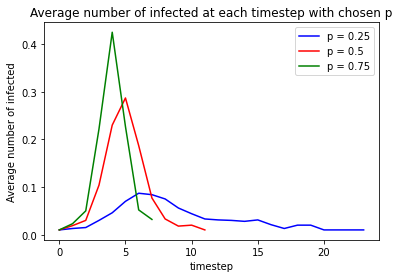

In [109]:
plt.plot(results[1][0],results[0][0], 'b-', label = "p = 0.25")
plt.plot(results[1][1],results[0][1], 'r-', label = "p = 0.5")
plt.plot(results[1][2],results[0][2], 'g-', label = "p = 0.75")
plt.xlabel("timestep")
plt.ylabel("Average number of infected")
plt.title("Average number of infected at each timestep with chosen p")
plt.legend(loc='best')
plt.show()

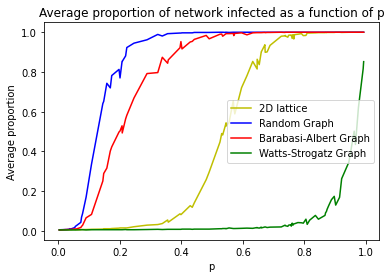

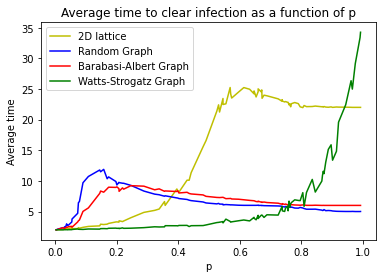

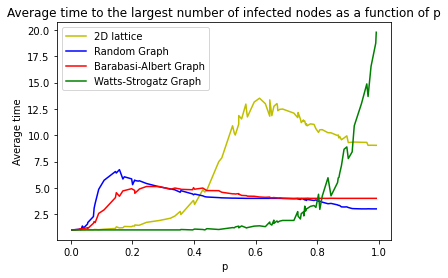

In [112]:
N = 200
G1 = nx.fast_gnp_random_graph(N, 0.07)
G2 = nx.barabasi_albert_graph(N, 5)
G3 = nx.watts_strogatz_graph(N, k = 2, p = 0.3)

list_of_p = []
for i in range(100):
    list_of_p.append(random.random())
list_of_p = sorted(list_of_p)
results_lattice = SIR_model_statistics(list_of_p, "lattice", (random.randint(1, int(np.sqrt(N))-1), random.randint(1, int(np.sqrt(N))-1)), int(np.sqrt(N)))
results_random = SIR_model_statistics(list_of_p, G1,  random.randint(1, N))
results_barabasi = SIR_model_statistics(list_of_p, G2, random.randint(1, N))
results_watts = SIR_model_statistics(list_of_p, G3, random.randint(1, N))

plt.figure()
plt.plot(list_of_p, results_lattice[2], 'y', label = "2D lattice")
plt.plot(list_of_p, results_random[2], 'b-', label = "Random Graph")
plt.plot(list_of_p, results_barabasi[2], 'r-', label = "Barabasi-Albert Graph")
plt.plot(list_of_p, results_watts[2], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average proportion")
plt.legend(loc='best')
plt.title("Average proportion of network infected as a function of p")

plt.figure()
plt.plot(list_of_p, results_lattice[3], 'y', label = "2D lattice")
plt.plot(list_of_p, results_random[3], 'b-', label = "Random Graph")
plt.plot(list_of_p, results_barabasi[3], 'r-', label = "Barabasi-Albert Graph")
plt.plot(list_of_p, results_watts[3], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average time")
plt.legend(loc='best')
plt.title("Average time to clear infection as a function of p")

plt.figure()
plt.plot(list_of_p, results_lattice[4], 'y', label = "2D lattice")
plt.plot(list_of_p, results_random[4], 'b-', label = "Random Graph")
plt.plot(list_of_p, results_barabasi[4], 'r-', label = "Barabasi-Albert Graph")
plt.plot(list_of_p, results_watts[4], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average time")
plt.legend(loc='best')
plt.title("Average time to the largest number of infected nodes as a function of p")
plt.show()